In [1]:
%matplotlib inline

import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
from md_distance import md_distance
from refframes import refframe_switch1
from refframes import refframe_switch2

In [2]:
source = 'vreede'
run = 'run2'
if source == 'vreede':
    current_dir = '/home/sanderroet/Ras-JV/'+run+'/analysis/'
    name = 'vreede_'+run
elif source == 'carbon':
    current_dir = '/home/sanderroet/carbon/kras_100ns/'+run+'/analysis/'
    name = 'carbon_'+run
xtc = current_dir + 'vis-md.xtc'
pdb = current_dir + 'vis-md.pdb'

In [3]:
%%time
trj = md.load(xtc, top = pdb)
#reference = md.load(test_pdb)

CPU times: user 17.1 s, sys: 1.07 s, total: 18.2 s
Wall time: 18.6 s


In [4]:
%%time
topology = trj.topology
G60 = topology.select('protein and (resSeq 60 or resSeq 63)')
gly60 = topology.select('protein and (resSeq 60) and not name H')
gly12 = topology.select('protein and (resSeq 12) and not name H')
glu63 = topology.select('protein and (resSeq 63) and not name H')
glu62 = topology.select('protein and (resSeq 62) and not name H')
glu37 = topology.select('protein and (resSeq 37) and not name H')

D33 = topology.select('protein and resSeq 33 and element O and not name O')
asp30 = topology.select('protein and resSeq 30')
his27 = topology.select('protein and resSeq 27')
GTP = topology.select('(resname GTP) and not name H')
GTP_sugar= topology.select('resname GTP and (name =~ "O[2-3]\'")')
MG = topology.select('element Mg')
switch1 = topology.select('protein and(resSeq 30 to 38)')# and not name H')
switch2 = topology.select('protein and(resSeq 60 to 76)')
for i in G60:
    print(topology.atom(i).residue)

GLY60
GLY60
GLY60
GLY60
GLY60
GLY60
GLY60
GLU63
GLU63
GLU63
GLU63
GLU63
GLU63
GLU63
GLU63
GLU63
GLU63
GLU63
GLU63
GLU63
GLU63
GLU63
CPU times: user 368 ms, sys: 0 ns, total: 368 ms
Wall time: 369 ms


In [5]:
GTP = topology.select('resname GTP or element Mg')
test = topology.select('(resname GTP or element Mg) or (protein and resSeq 60 to 76)')
gtp_trj = trj.atom_slice(GTP)
switch2_trj = trj.atom_slice(switch2)

In [6]:
gtp_center = md.compute_center_of_mass(gtp_trj)
switch2_center = md.compute_center_of_mass(switch2_trj)

print(gtp_center[0])
print(switch2_center[0])


[ 4.85118503  4.52399635  2.08145316]
[ 6.42680571  5.43389099  1.9463817 ]


In [7]:
distances = gtp_center - switch2_center
results = []
for i in distances:
    temp = (i[0]**2) + (i[1]**2) + (i[2]**2)
    results.append(temp**(0.5))



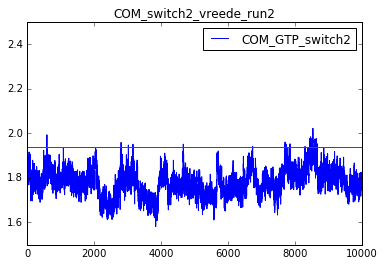

In [8]:


for i, e in enumerate([results]):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    y = e
    x = range(len(e))

    if i == 0 or i == 1:
        lbl = 'COM_GTP_switch2'
        savename='gtp_switch2_center_of_mass_distance'
        start, stop = refframe_switch2[name]
    ax.plot(x,y, label = lbl)

    for i, j in enumerate(start): 
        x1 = range(j,stop[i])
        y1 = e[j:stop[i]]
        ax.plot(x1,y1, c='green')
    ax.plot([x[0],x[-1]],[1.94,1.94], c='red')
    plt.ylim([1.5,2.5])
#    ax.set_ylabel('nm')
#    ax.set_xlabel('frame')
    ax.set_title('COM_switch2_'+source+'_'+run)
    ax.legend()
    plt.show
fig.savefig(current_dir+'center_of_mass_switch2.png')